In [26]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm


In [27]:
file_path = r"C:\\Users\\sabia\\Downloads\\image.fits"  # Double backslashes for Windows path

hdulist = fits.open(file_path)
hdulist.info()


Filename: C:\\Users\\sabia\\Downloads\\image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     337   (256, 256)   int16 (rescales to float32)   


In [28]:
data = hdulist[0].data.astype(np.float64)  # Change [0] if hdulist.info() shows image elsewhere
hdulist.close()

In [29]:
bkg = sep.Background(data)
data_sub = data - bkg.back()

In [30]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

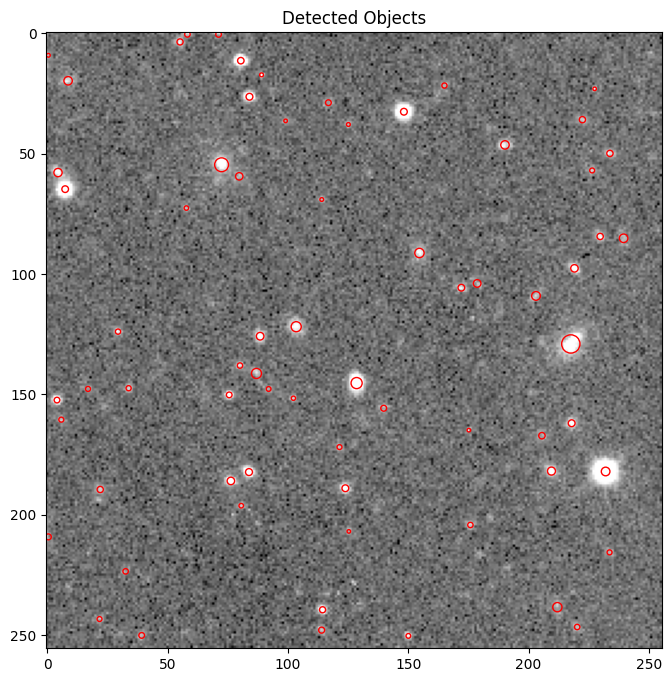

In [31]:
fig, ax = plt.subplots()
norm = simple_norm(data, 'sqrt', percent=99)
ax.imshow(data, cmap='gray', norm=norm)
for obj in objects:
    e = plt.Circle((obj['x'], obj['y']), obj['a'], edgecolor='red', facecolor='none')
    ax.add_patch(e)
plt.title('Detected Objects')
plt.savefig('detected_objects_local.png')
plt.show()

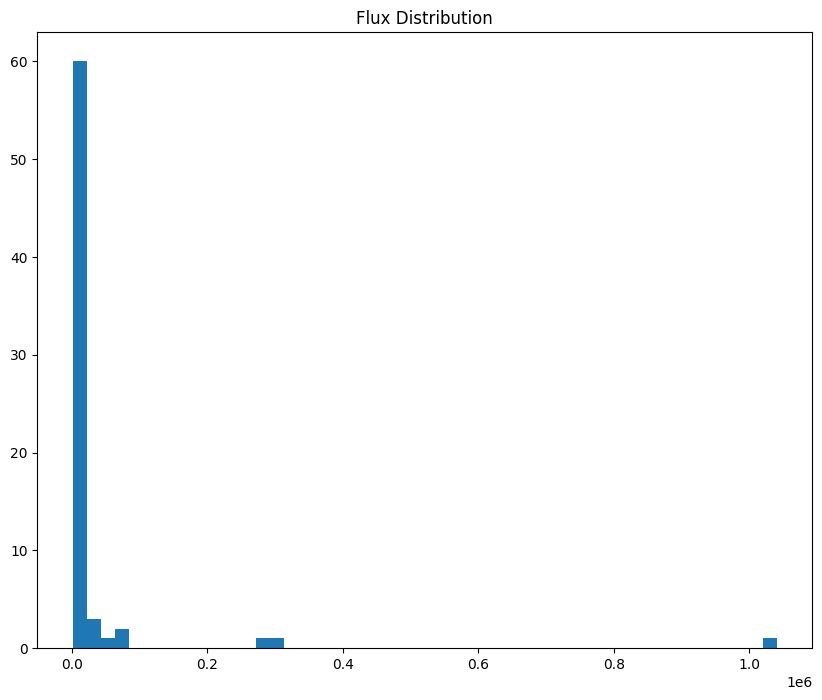

In [32]:
fluxes = np.array([obj['flux'] for obj in objects])
plt.hist(fluxes, bins=50)
plt.title('Flux Distribution')
plt.savefig('flux_histogram_local.png')
plt.show()